In [2]:
import numpy
import pandas as pd
import torch
import torch.nn as nn

In [3]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.shape,test_data.shape

((1460, 81), (1459, 80))

In [6]:
print(train_data.iloc[0:4, [0,1,2,3,4,-2,-1]])

   Id  MSSubClass MSZoning  LotFrontage  LotArea SaleCondition  SalePrice
0   1          60       RL         65.0     8450        Normal     208500
1   2          20       RL         80.0     9600        Normal     181500
2   3          60       RL         68.0    11250        Normal     223500
3   4          70       RL         60.0     9550       Abnorml     140000


In [7]:
all_features = pd.concat((train_data.iloc[:,1:-1], test_data.iloc[:, 1:]))

In [8]:
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Data preprocessing

Dealing with numeric features, by noramlisation and filling it with na

In [9]:
all_features.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [10]:
all_features.dtypes[all_features.dtypes=='int64']

MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
dtype: object

In [11]:
numeric_features = all_features.dtypes[all_features.dtypes!='object'].index

In [12]:
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [13]:
all_features[numeric_features] = all_features[numeric_features].apply(lambda x : (x-x.mean())/x.std())

In [14]:
all_features[numeric_features][:5]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0.348780,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,-0.059772,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0.627338,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0.785188,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,1.685860,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619


In [15]:
all_features[numeric_features] = all_features[numeric_features].fillna(0)

dealing with discrete features, we do one hot encoding

In [16]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features[:5]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,0,1,0,0,0,0,0,1,0,0


In [17]:
train_data.iloc[:,-1], train_data.SalePrice

(0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64,
 0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64)

In [18]:
n_train = len(train_data)

train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)

train_labels = torch.tensor(train_data.iloc[:,-1].values, dtype=torch.float32)

In [19]:
loss = nn.MSELoss()

in_features = train_features.shape[1]
out_features = 1

def get_net():
    net = nn.Sequential(nn.Linear(in_features,out_features))
    return net

In [20]:
def log_rmse(net, features, labels):
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
#     print(clipped_preds, labels)
    rmse = torch.sqrt(loss(torch.log(clipped_preds), torch.log(labels)))
    return rmse.item()
    

In [21]:
def load_array(data_array, batch_size):
    train_dataset = torch.utils.data.TensorDataset(*(data_array))
    train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    return train_dataloader
    

In [22]:
def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size):
    train_ls , test_ls = [],[]
    train_iter = load_array((train_features, train_labels), batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate, weight_decay=weight_decay)
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            y_hat = net(X)
#             print(y_hat.shape, y.shape)
            l = loss(y_hat,y.unsqueeze(1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if (test_labels is not None):
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls
            

In [23]:
net = get_net()
net

Sequential(
  (0): Linear(in_features=331, out_features=1, bias=True)
)

In [24]:
net(train_features).detach()

tensor([[-0.0065],
        [-0.0024],
        [ 0.1508],
        ...,
        [-0.3997],
        [-0.3274],
        [ 0.0482]])

In [25]:
test_labels = None
num_epochs = 100
learning_rate = 0.03
weight_decay=0
batch_size = 64
# train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size)

In [26]:
# K fold validation

# getting the ith slice
def get_k_fold_data(K, i, X, y):
    X_train, X_valid, y_train, y_valid = None, None, None, None
    len_of_slice = len(X)//K
    
    for j in range(K):
        index = slice(j * len_of_slice, (j+1) * len_of_slice)
        if j==i:
            X_valid, y_valid =  X[index,:], y[index]
        elif X_train is None:
            X_train, y_train = X[index, :], y[index]
        else:
            X_train = torch.cat([X_train, X[index,:]], 0)
            y_train = torch.cat([y_train, y[index]], 0)
    
    return X_train, y_train, X_valid, y_valid

In [27]:
for X, y in load_array((train_features, train_labels), batch_size):
    print(get_k_fold_data(5, 2, X, y))
    break

(tensor([[ 0.0673,  0.0297, -0.1798,  ...,  1.0000,  0.0000,  0.0000],
        [ 2.4193,  0.0000, -1.0389,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.4153,  0.3334,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [-0.8735, -0.2273,  0.0389,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.8865,  0.8937,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1679, -0.3986, -0.0720,  ...,  1.0000,  0.0000,  0.0000]]), tensor([200500.,  83500., 200000., 149900., 333168.,  81000.,  95000., 175000.,
        104900., 165000., 173000., 197500., 270000., 190000., 239000., 130000.,
        120000., 145000., 265000., 214000.,  79500., 122000., 178000., 159500.,
        110000., 179665., 148000., 165500., 205000., 130000., 173500., 192000.,
        266000., 129000., 277000., 155000., 171000., 275000., 145000., 201000.,
        180500., 128500., 175000., 108000., 305000., 245350.,  84500., 125000.]), tensor([[ 1.4785, -0.3986, -0.3620,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.

In [39]:
import matplotlib.pyplot as plt

def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train )
        
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size)
        
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        
        if i == 0:
            plt.plot(list(range(1, num_epochs + 1)), train_ls)
            plt.plot(list(range(1, num_epochs + 1)), valid_ls)
            plt.show()
            
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k
        
    

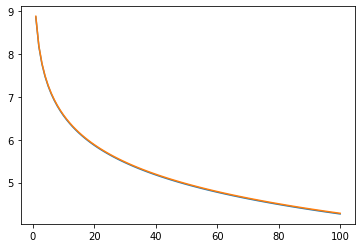

fold 1, train log rmse 4.271430, valid log rmse 4.285734
fold 2, train log rmse 4.270645, valid log rmse 4.284245
fold 3, train log rmse 4.269564, valid log rmse 4.285371
fold 4, train log rmse 4.279699, valid log rmse 4.253248
fold 5, train log rmse 4.273084, valid log rmse 4.274539
5-fold validation: avg train log rmse: 8.857897, avg valid log rmse: 8.861647


In [40]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64

train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, learning_rate, weight_decay, batch_size)
print(f'{k}-fold validation: avg train log rmse: {float(train_l):f}, '
      f'avg valid log rmse: {float(valid_l):f}')

In [62]:
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None, num_epochs, lr, weight_decay, batch_size)

    plt.plot(range(1, num_epochs +1 ),train_ls)
    plt.show()
    print(f"train log rmse : {float(train_ls[-1])}")
    
    preds = net(test_features).detach().numpy()
    print(preds, preds.reshape(1,-1))
    test_data['SalePrice'] = pd.Series(preds.reshape(1,-1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)
    

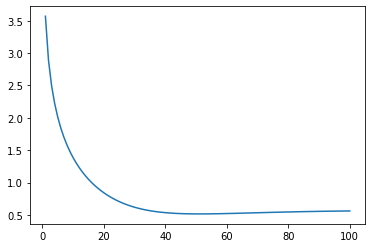

train log rmse : 0.5620248913764954
[[119611.02]
 [154316.6 ]
 [198771.25]
 ...
 [208928.7 ]
 [107290.01]
 [240775.48]] [[119611.02 154316.6  198771.25 ... 208928.7  107290.01 240775.48]]


In [63]:
import numpy as np
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

### Exercises
1. Submit your predictions for this section to Kaggle. How good are your predictions?

* I got a rmse value of 0.16703

2. Can you improve your model by minimizing the logarithm of prices directly? What happens
if you try to predict the logarithm of the price rather than the price?

* The log rmse values are coming as Nan

3. Is it always a good idea to replace missing values by their mean? Hint: can you construct a
situation where the values are not missing at random?

* It might be the case where the date data is given and dates in between are missing in that case we can put in the date

4. Improve the score on Kaggle by tuning the hyperparameters through K-fold crossvalidation.

* I have improved it once.

5. Improve the score by improving the model (e.g., layers, weight decay, and dropout).

* tried adding more layers but accuracy decreased.

6. What happens if we do not standardize the continuous numerical features like what we have
done in this section?

* improper features size that are different for different features.

In [67]:
# 2
#lets try to improve the model minimizing th elograithm of prices directly

def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size):
    train_ls , test_ls = [],[]
    train_iter = load_array((train_features, train_labels), batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate, weight_decay=weight_decay)
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            y_hat = net(X)
#             print(y_hat.shape, y.shape)

#applying loghere
            l = loss(torch.log(y_hat),torch.log(y.unsqueeze(1)))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
#         train_ls.append(log_rmse(net, train_features, train_labels))
        train_ls.append(l)
        if (test_labels is not None):
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls


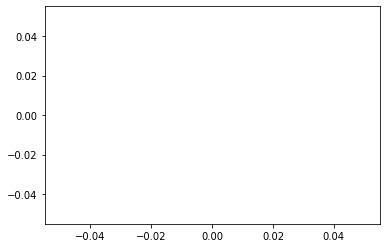

fold 1, train log rmse nan, valid log rmse nan
fold 2, train log rmse nan, valid log rmse nan
fold 3, train log rmse nan, valid log rmse nan
fold 4, train log rmse nan, valid log rmse nan
fold 5, train log rmse nan, valid log rmse nan
5-fold validation: avg train log rmse: nan, avg valid log rmse: nan


In [68]:
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, learning_rate, weight_decay, batch_size)
print(f'{k}-fold validation: avg train log rmse: {float(train_l):f}, '
      f'avg valid log rmse: {float(valid_l):f}')

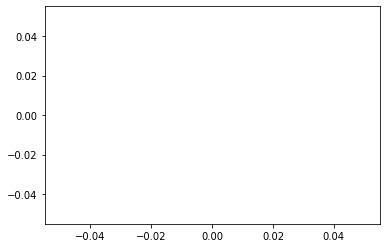

train log rmse : nan
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]] [[nan nan nan ... nan nan nan]]


In [66]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

In [69]:
#4 #5

def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size):
    train_ls , test_ls = [],[]
    train_iter = load_array((train_features, train_labels), batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate, weight_decay=weight_decay)
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            y_hat = net(X)
#             print(y_hat.shape, y.shape)
            l = loss(y_hat,y.unsqueeze(1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if (test_labels is not None):
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

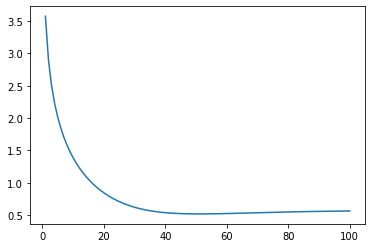

train log rmse : 0.5619795322418213
[[119157.06]
 [153885.84]
 [198517.55]
 ...
 [207881.92]
 [106919.84]
 [240714.4 ]] [[119157.06 153885.84 198517.55 ... 207881.92 106919.84 240714.4 ]]


In [70]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

In [77]:
loss = nn.MSELoss()

in_features = train_features.shape[1]
out_features = 1

def get_net():
    net = nn.Sequential(nn.Linear(in_features,256), nn.ReLU(), nn.Dropout(0.4), nn.Linear(256,64),nn.ReLU(), nn.Dropout(0.3), nn.Linear(64, out_features))
    return net

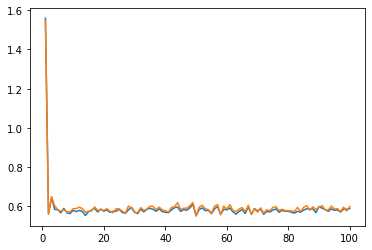

fold 1, train log rmse 0.588832, valid log rmse 0.599219
fold 2, train log rmse 0.578097, valid log rmse 0.607119
fold 3, train log rmse 0.575904, valid log rmse 0.632743
fold 4, train log rmse 0.583112, valid log rmse 0.537987
fold 5, train log rmse 0.590753, valid log rmse 0.559252
fold 6, train log rmse 0.574134, valid log rmse 0.556549
6-fold validation: avg train log rmse: 1.570151, avg valid log rmse: 1.569652


In [78]:
k, num_epochs, lr, weight_decay, batch_size = 6, 100, 5, 0.1, 64

train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, learning_rate, weight_decay, batch_size)
print(f'{k}-fold validation: avg train log rmse: {float(train_l):f}, '
      f'avg valid log rmse: {float(valid_l):f}')

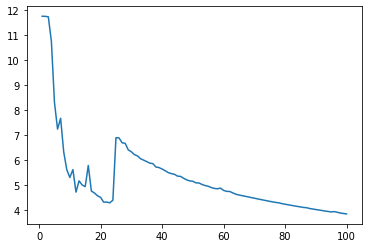

train log rmse : 3.8533828258514404
[[3609.823]
 [3609.823]
 [3609.823]
 ...
 [3609.823]
 [3609.823]
 [3609.823]] [[3609.823 3609.823 3609.823 ... 3609.823 3609.823 3609.823]]


In [79]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)